In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Database


In [208]:
data = pd.read_csv('Dataset of Diabetes .csv')
#print(data)

# check duplication in rows & drop the columns od id and patient Number

In [209]:
duplicates = data[data.duplicated()]
print("🔍 Duplicate rows found:\n", duplicates)
db = data.drop(data.columns[[0, 1]], axis=1)
print(db)

🔍 Duplicate rows found:
 Empty DataFrame
Columns: [ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, CLASS]
Index: []
    Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1        M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4        M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...   ...
995      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0     Y
996      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2    Y 
997      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4    Y 
998      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5    Y 
999      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.

# Data Quality Assessment

In [210]:
print(f"Dataset shape: {db.shape}")
print(f"\nMissing values:\n{db.isnull().sum()}")
print(f"\nData types:\n{db.dtypes}")

Dataset shape: (1000, 12)

Missing values:
Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

Data types:
Gender     object
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS      object
dtype: object


# take the upper case of categorical variables and convert it & Ensure numerical types

In [211]:
db['Gender'] = db['Gender'].str.strip().str.upper()
db['CLASS'] = db['CLASS'].str.strip().str.upper()


db['Gender'] = db['Gender'].map({'M': 0, 'F': 1,'m':0})
db['CLASS'] = db['CLASS'].map({'N': 0, 'P': 1, 'Y': 2})
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
numerical_cols_exclude_Age = ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
print(db.dtypes)
print(db)
print(f"\nMissing values:\n{db.isnull().sum()}")


Gender      int64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS       int64
dtype: object
     Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  CLASS
0         1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1         0   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2         1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
3         1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
4         0   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0
..      ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...    ...
995       0   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0      2
996       0   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2      2
997       0   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4      2
998       0   38   5.8  59    

# Detect outliers for each feature except Age 

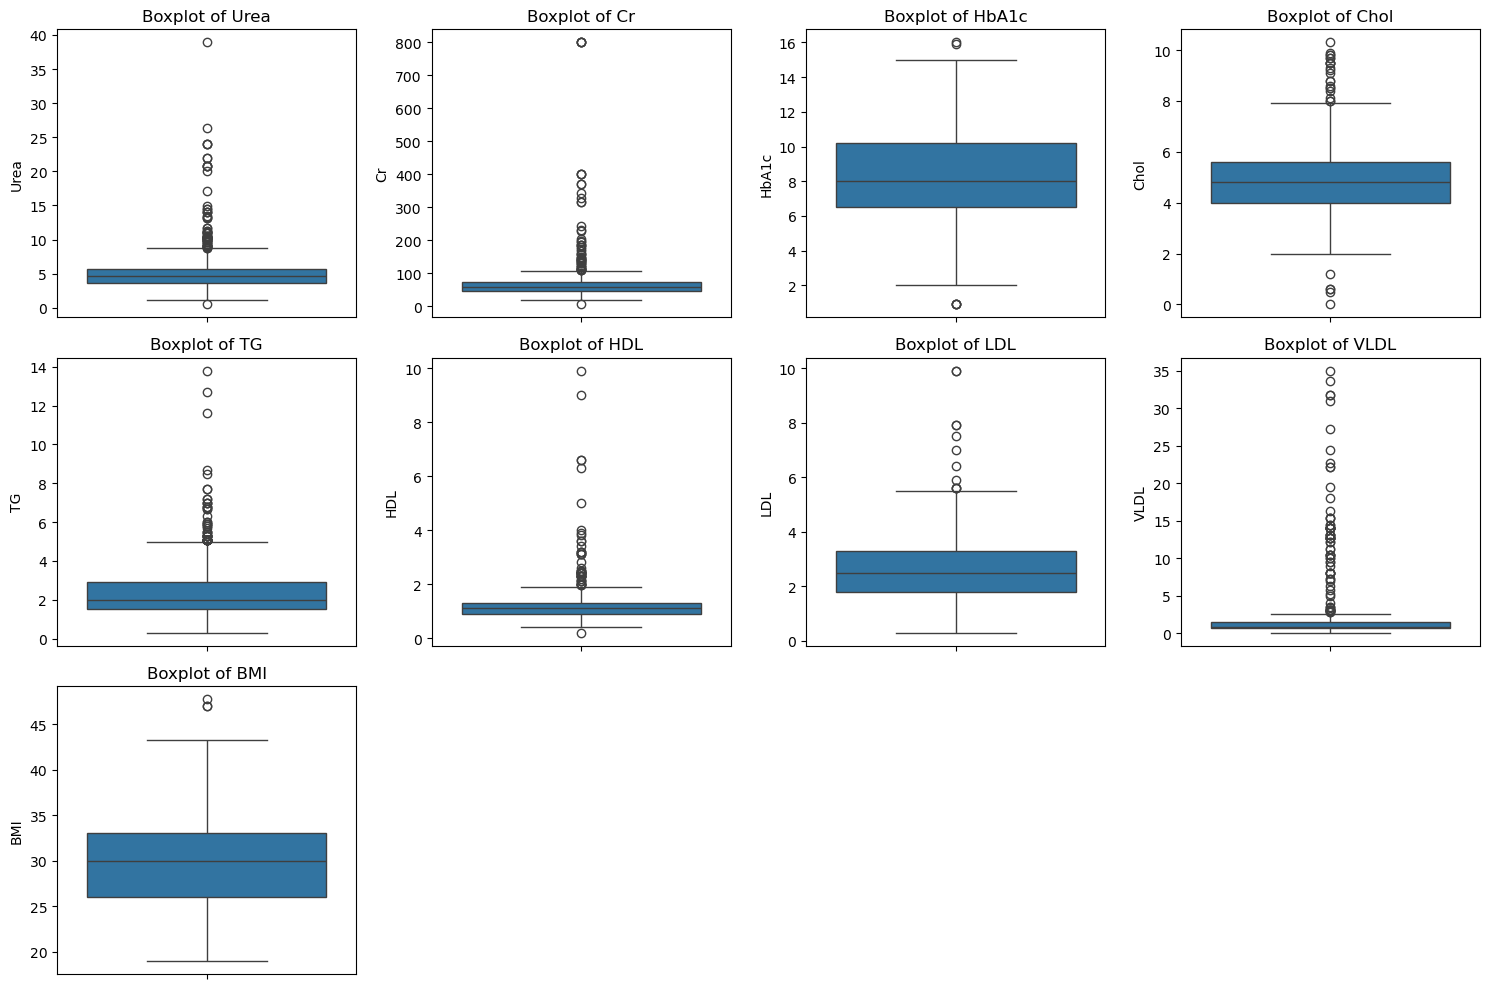

In [212]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

iqr_outliers = {}
for col in numerical_cols_exclude_Age:

    iqr_outliers[col] = detect_outliers_iqr(db[col])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_exclude_Age, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=db[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Check skewness and kurtosis

In [213]:

for col in numerical_cols_exclude_Age:
    skewness = db[col].skew()
    kurtosis = db[col].kurtosis()
    print(f"{col}: Skewness={skewness:.2f}, Kurtosis={kurtosis:.2f}")

Urea: Skewness=4.30, Kurtosis=30.43
Cr: Skewness=8.47, Kurtosis=91.71
HbA1c: Skewness=0.22, Kurtosis=-0.25
Chol: Skewness=0.62, Kurtosis=1.92
TG: Skewness=2.30, Kurtosis=10.26
HDL: Skewness=6.28, Kurtosis=62.63
LDL: Skewness=1.15, Kurtosis=4.28
VLDL: Skewness=5.35, Kurtosis=33.51
BMI: Skewness=0.13, Kurtosis=-0.30


# Outlier Treatment

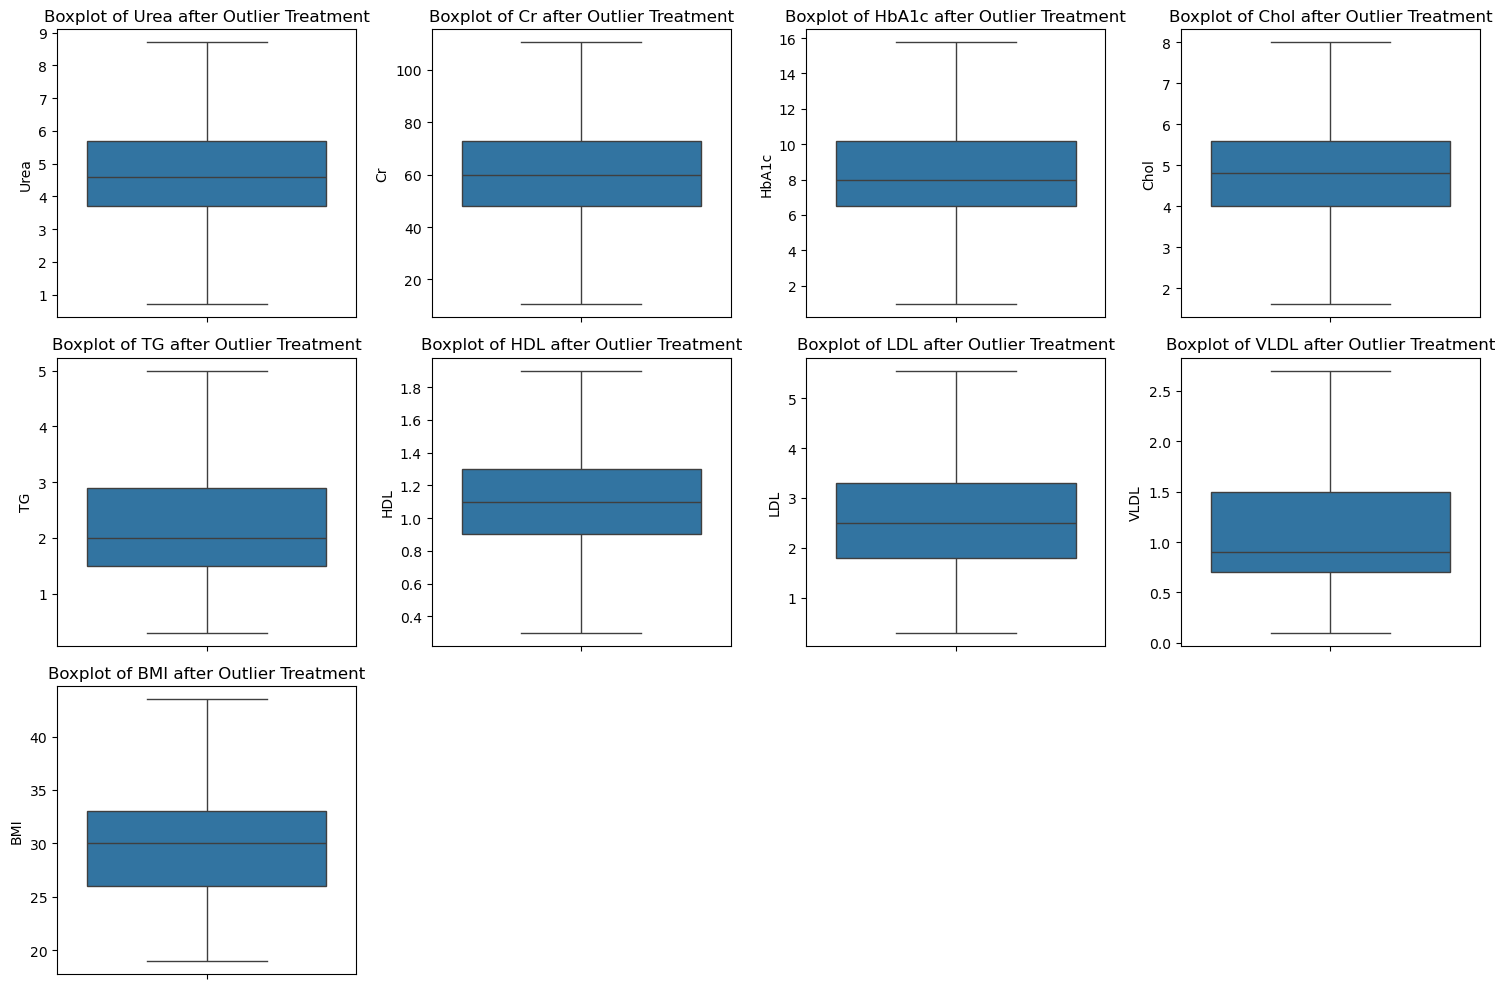

In [214]:
def treat_outliers_iqr(db, column):
    Q1 = db[column].quantile(0.25)
    Q3 = db[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    db[column] = np.where(db[column] < lower_bound, lower_bound, db[column])
    db[column] = np.where(db[column] > upper_bound, upper_bound, db[column])
    return db

for col in numerical_cols_exclude_Age:
    db = treat_outliers_iqr(db, col)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_exclude_Age, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=db[col])
    plt.title(f'Boxplot of {col} after Outlier Treatment')
plt.tight_layout()
plt.show()

# Correlation Matrix

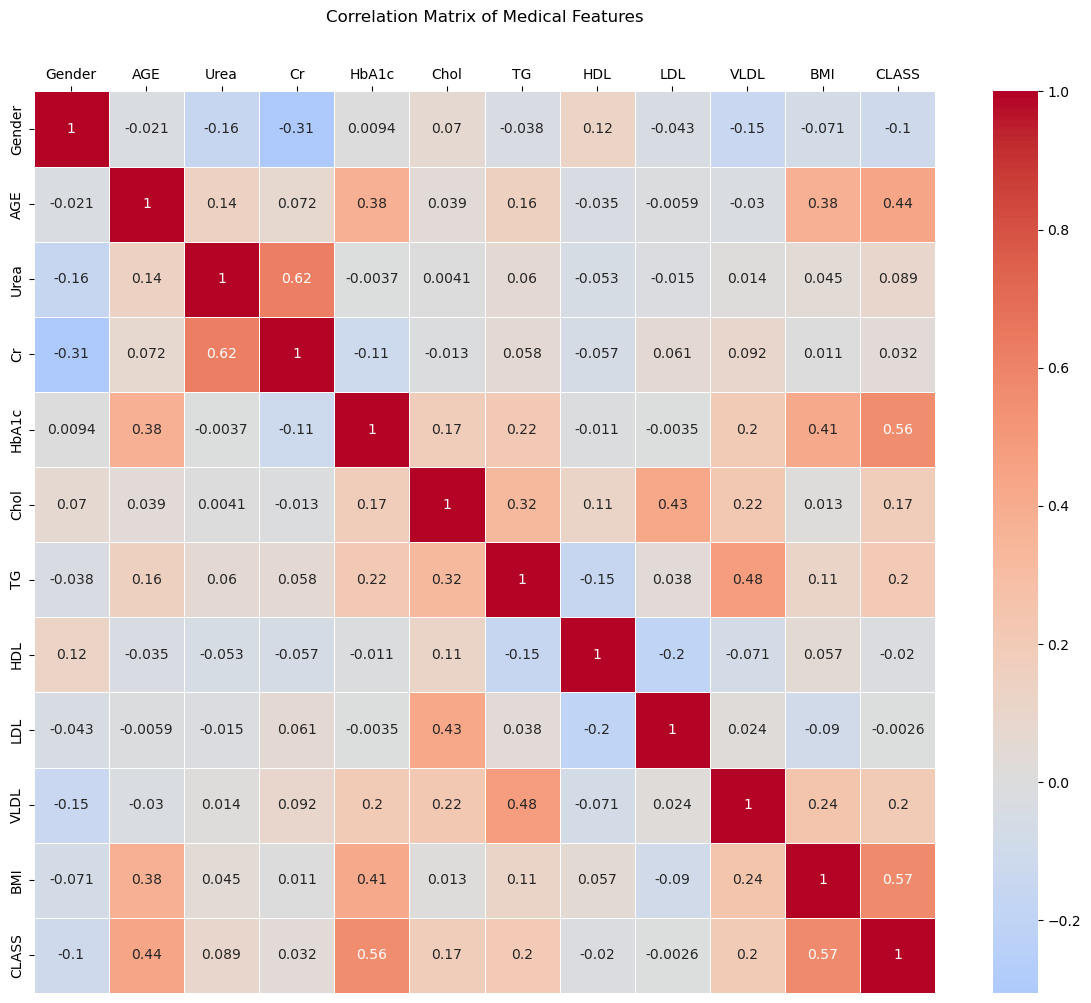

In [215]:
plt.figure(figsize=(12, 10))
correlation_matrix = db.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,square=True, linewidths=0.5)
plt.gca().xaxis.tick_top()
plt.title('Correlation Matrix of Medical Features', pad=50)
plt.tight_layout()
plt.show()

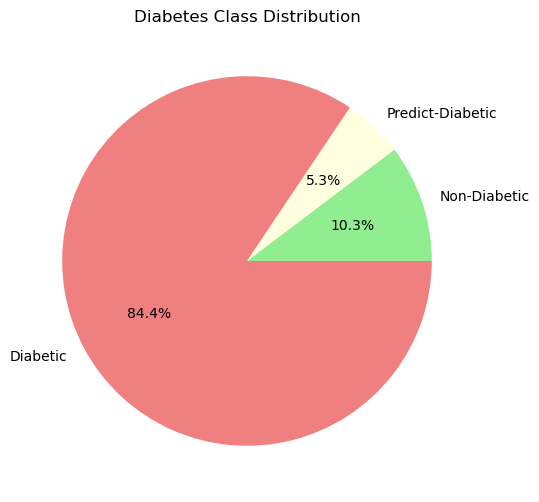

In [216]:
# Class distribution
plt.figure(figsize=(8, 6))
class_counts = db['CLASS'].value_counts().sort_index()
plt.pie(class_counts.values, labels=['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'], 
        autopct='%1.1f%%', colors=['lightgreen', 'lightyellow', 'lightcoral'])
plt.title('Diabetes Class Distribution')
plt.show()

# Distribution of key features by diabetes class

C:\Users\abdel\AppData\Local\Temp\ipykernel_19604\579649871.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non', 'Predict', 'Diabetic'])
C:\Users\abdel\AppData\Local\Temp\ipykernel_19604\579649871.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non', 'Predict', 'Diabetic'])


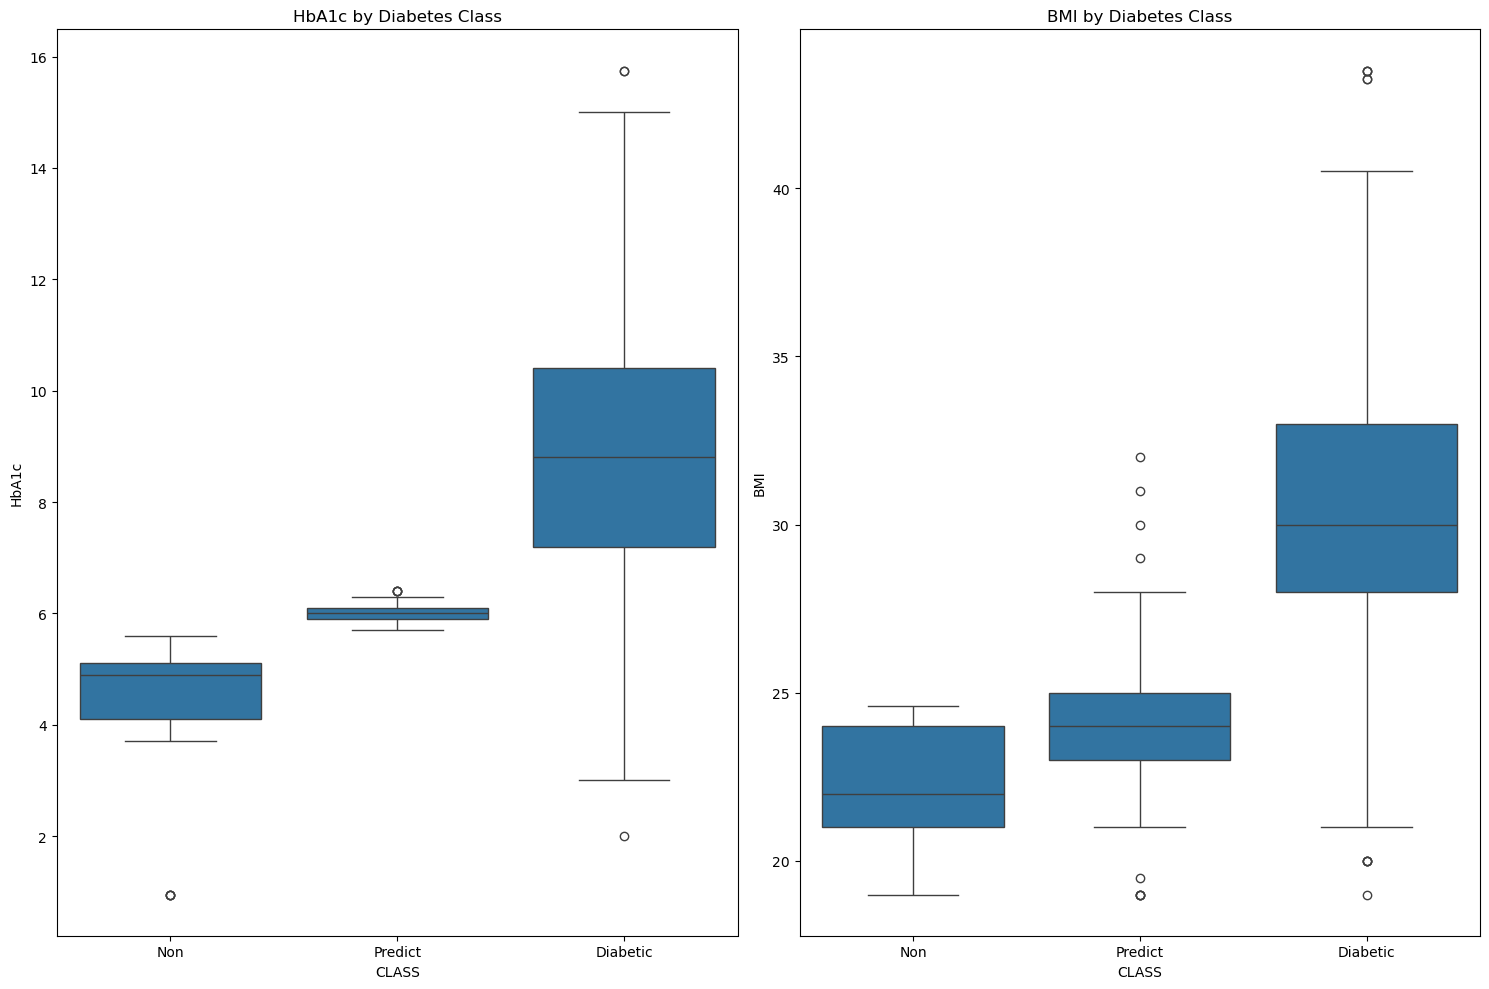

In [217]:
key_features = ['HbA1c', 'BMI']
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    sns.boxplot(x='CLASS', y=feature, data=db, ax=axes[i])
    axes[i].set_title(f'{feature} by Diabetes Class')
    axes[i].set_xticklabels(['Non', 'Predict', 'Diabetic'])

plt.tight_layout()
plt.show()

# Select key features for pairplot

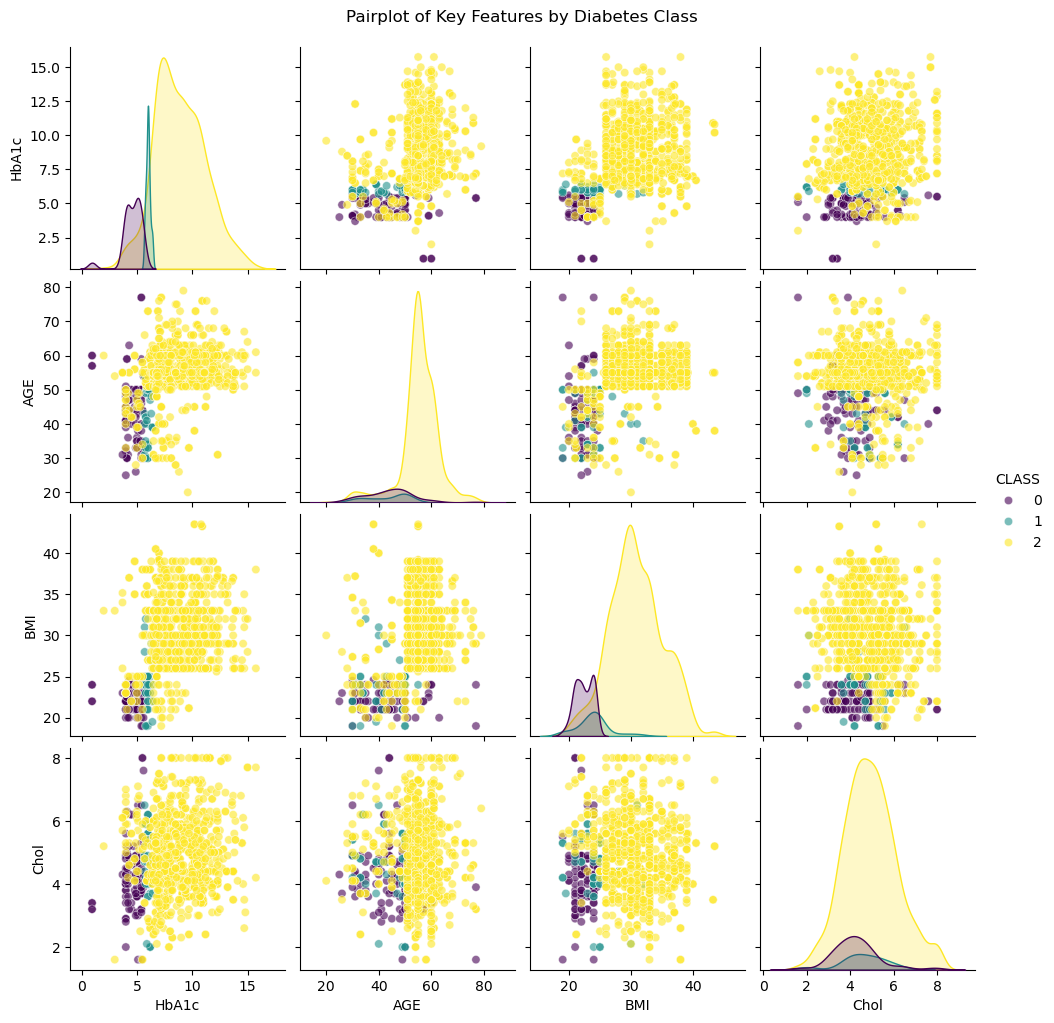

In [218]:
key_vars = ['HbA1c', 'AGE', 'BMI', 'Chol', 'CLASS']
sns.pairplot(db[key_vars], hue='CLASS', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Features by Diabetes Class', y=1.02)
plt.show()

# Age and HbA1c Relationship

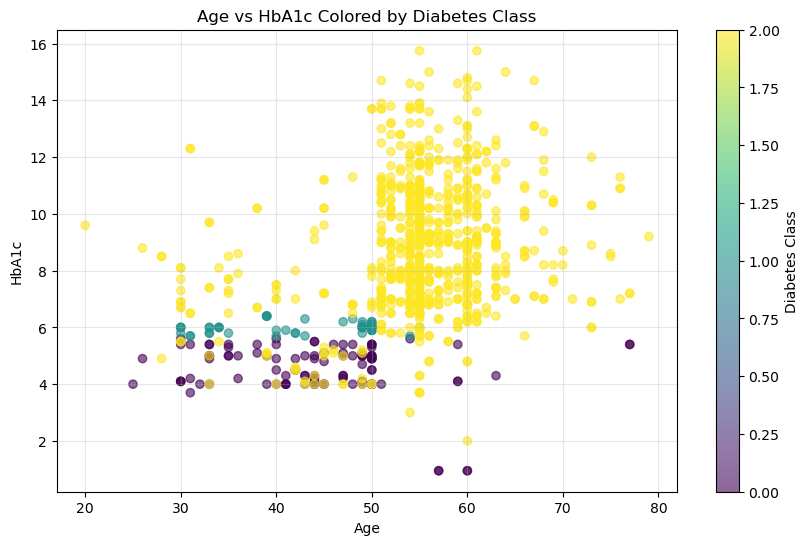

In [219]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(db['AGE'], db['HbA1c'], c=db['CLASS'], 
                     cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Diabetes Class')
plt.xlabel('Age')
plt.ylabel('HbA1c')
plt.title('Age vs HbA1c Colored by Diabetes Class')
plt.grid(True, alpha=0.3)
plt.show()

# Age and BMI Relationship

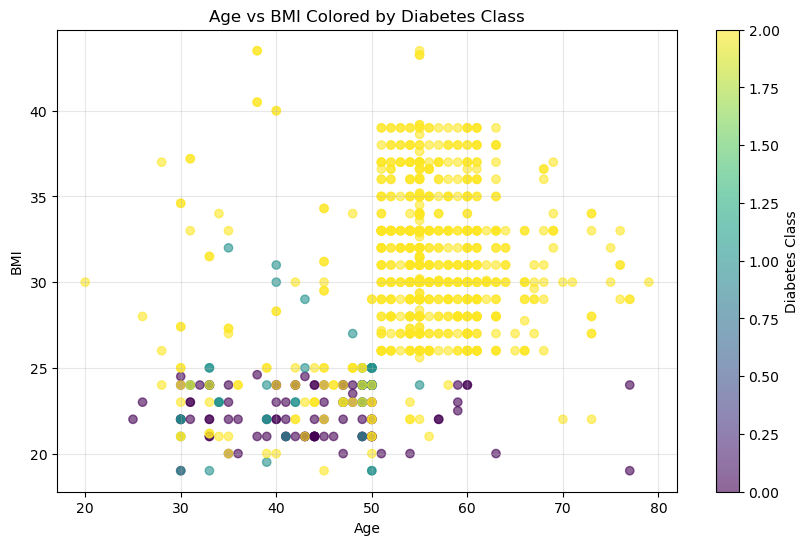

In [220]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(db['AGE'], db['BMI'], c=db['CLASS'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Diabetes Class')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI Colored by Diabetes Class')
plt.grid(True, alpha=0.3)
plt.show()

# BMI and HbA1c Relationship

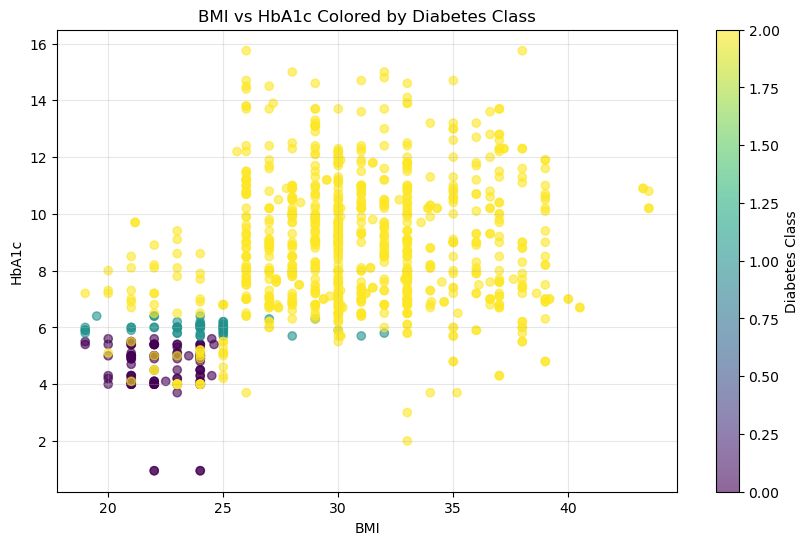

In [221]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(db['BMI'], db['HbA1c'], c=db['CLASS'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Diabetes Class')
plt.xlabel('BMI')
plt.ylabel('HbA1c')
plt.title('BMI vs HbA1c Colored by Diabetes Class')
plt.grid(True, alpha=0.3)
plt.show()

# BMI Distribution by Gender and Class

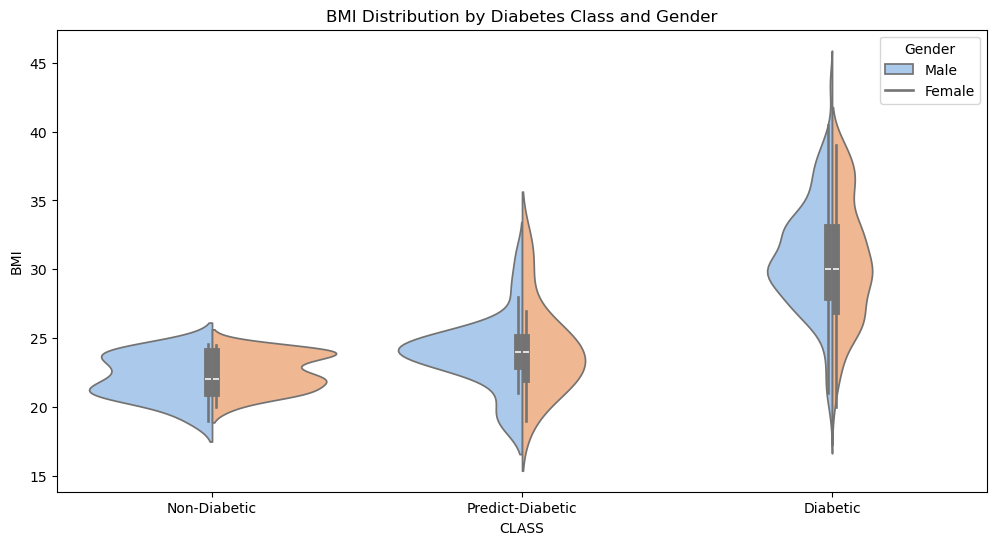

In [222]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='CLASS', y='BMI', hue='Gender', data=db, split=True,palette='pastel')
plt.title('BMI Distribution by Diabetes Class and Gender')
plt.xticks([0, 1, 2], ['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

# HbA1c Distribution by Gender and Class

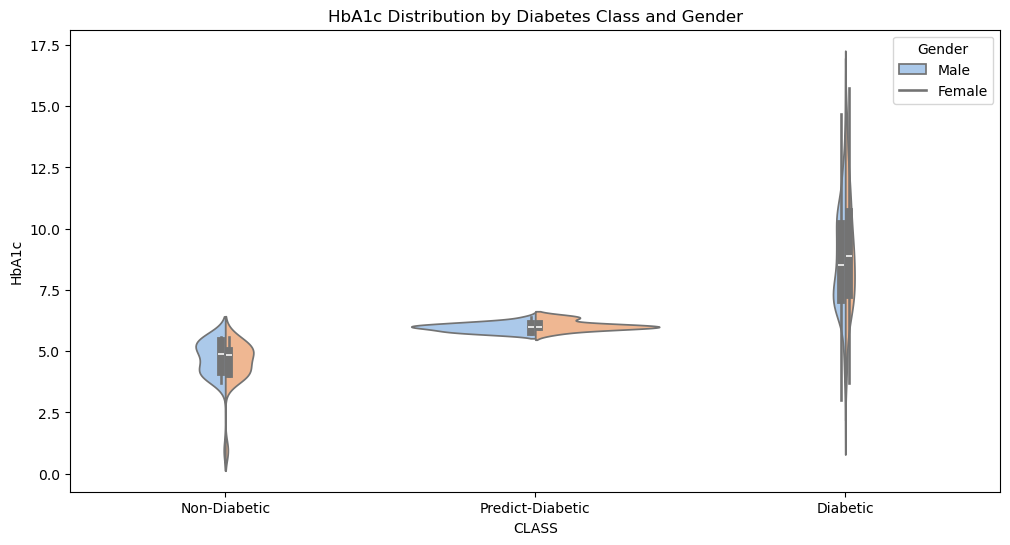

In [223]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='CLASS', y='HbA1c', hue='Gender', data=db, split=True,palette='pastel')
plt.title('HbA1c Distribution by Diabetes Class and Gender')
plt.xticks([0, 1, 2], ['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()